<a href="https://colab.research.google.com/github/Nerobite/Math_for_DS_Netologia/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
from sympy import *
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.optimize import curve_fit
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial import distance
from operator import itemgetter
%matplotlib inline

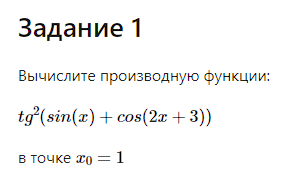

In [ ]:
x = Symbol('x')

In [ ]:
y = tan(sin(x)+ cos(2*x+3))**2

In [ ]:
y

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
#Производная функции равна:
y.diff(x)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
x0 = 1

In [ ]:
#Значение функции в х=1 равно
y.diff(x).evalf(subs={x:x0})

55.3859176353379

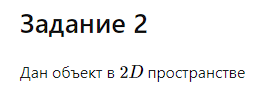

(-200.0, 200.0)

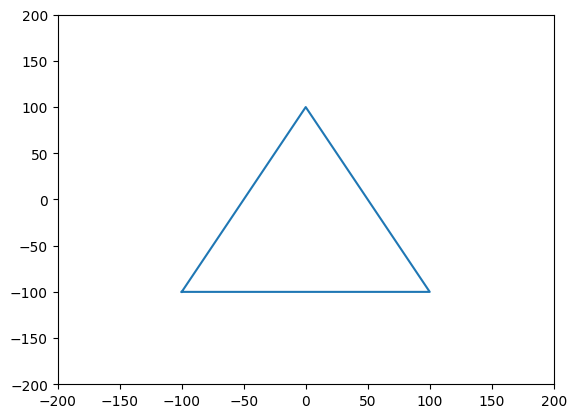

In [8]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

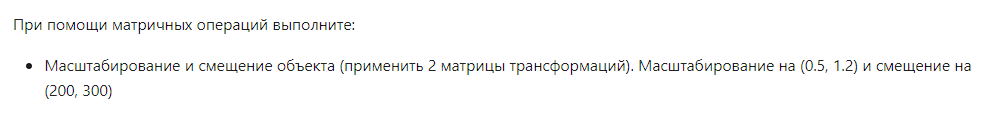

In [15]:
#Масштабирование
a = np.array([[0.5,0,0],[0,1.2,0],[0,0,1]])

In [16]:
#Смещение
b = np.array([[1,0,0],[0,1,0],[200,300,1]])

In [17]:
B = np.dot(a, b)

In [18]:
B

array([[  0.5,   0. ,   0. ],
       [  0. ,   1.2,   0. ],
       [200. , 300. ,   1. ]])

In [19]:
C = A@B

In [20]:
C

array([[150., 180.,   1.],
       [200., 420.,   1.],
       [250., 180.,   1.],
       [150., 180.,   1.]])

(-200.0, 400.0)

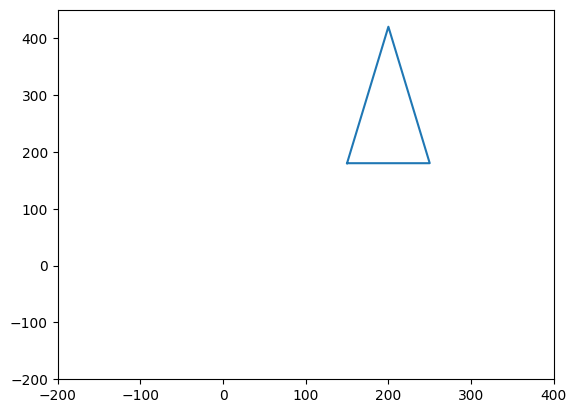

In [21]:
C = np.array(C)

x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([-200, 450])
plt.xlim([-200, 400])

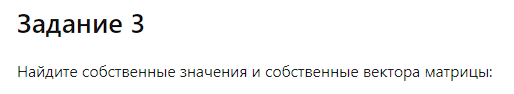

In [35]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [36]:
v, w = np.linalg.eig(m)

In [37]:
#Собственные значения
v

array([ 3., -1.])

In [38]:
#матрица собственных векторов
w

array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]])

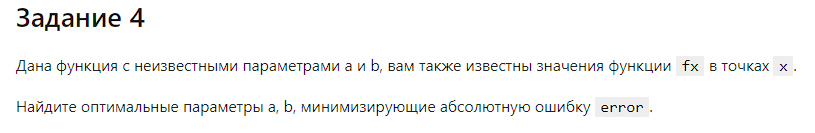

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

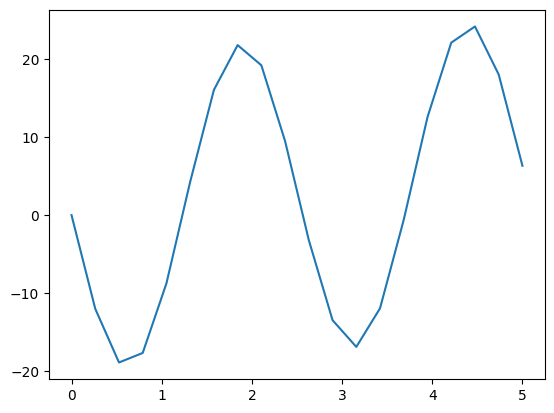

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Best parameters: [ 3.  -2.5]
Best RMSE: 9.637002968333997e-08


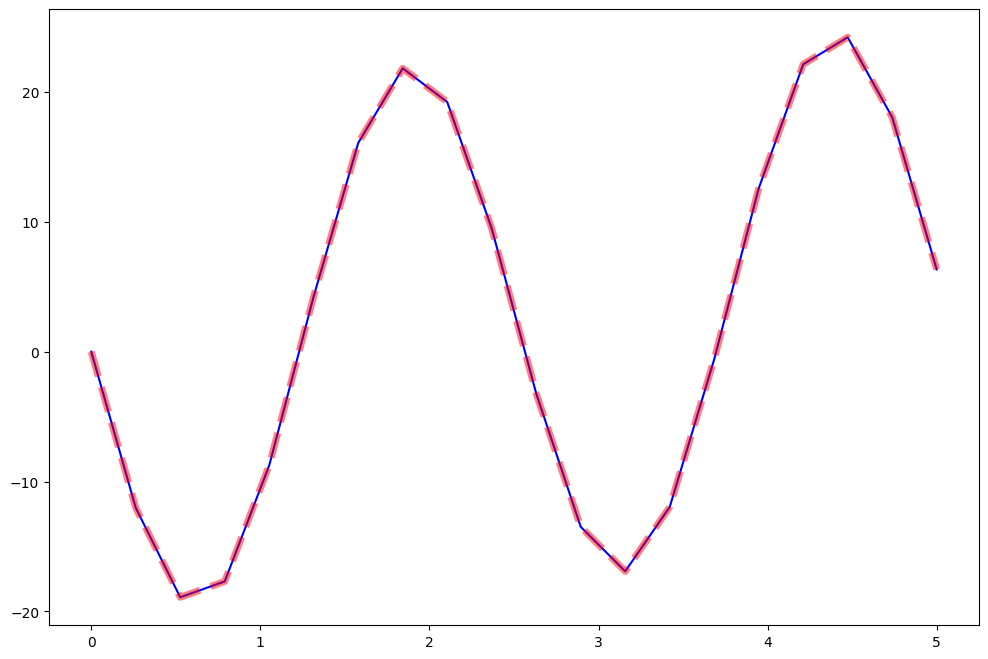

In [ ]:
a_range = np.arange(0, 2, 0.1)
b_range = np.arange(0, 2, 0.1)

# Инициализируем переменные для хранения лучших параметров и RMSE
best_params = None
best_rmse = float('inf')

# Перебираем параметры и находим модель с наименьшим RMSE
for a in a_range:
    for b in b_range:

        # Вызываем curve_fit для текущих параметров
        params, _ = curve_fit(f, x, fx, [a, b])

        # Вычисляем прогнозные значения и RMSE
        y_pred = f(x, *params)
        rmse = np.sqrt(np.mean((fx - y_pred) ** 2))

        # Сохраняем параметры, если RMSE меньше текущего лучшего
        if rmse < best_rmse:
            best_params = params
            best_rmse = rmse

# Выводим лучшие параметры и RMSE
print('Best parameters:', best_params)
print('Best RMSE:', best_rmse)

plt.figure(figsize = (12, 8))
plt.plot(x, fx, color='blue')
plt.plot(x, f(x, best_params[0], best_params[1]), color = 'red', linestyle = '--', linewidth = 5, alpha=0.5)
plt.show()

In [ ]:
absolute_error = error(best_params)
absolute_error

1.5365207568507344e-06

In [ ]:
a = best_params[0]
a

3.0000000005122343

In [ ]:
b = best_params[1]
b

-2.4999999994806203

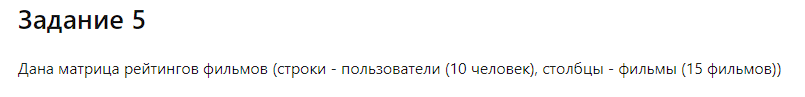

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

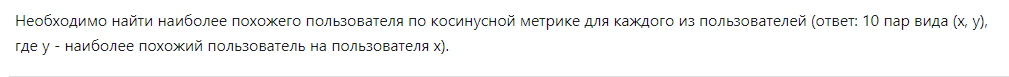

In [ ]:
user_similarity = pairwise_distances(raitings, metric='cosine')

In [ ]:
user_similarity

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [ ]:
user_similarity[0]

array([0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
       0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224])

In [ ]:
user_similarity[5]

array([0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
       0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092])

In [ ]:
user_ = distance.cosine(raitings[0], raitings[5])
user_

0.2588145212690468

Можно считать, что косинусное расстояние обозначает степень похожести. Чем пользователи более похожи друг на друга — тем меньше будет косинусное расстояние.

In [ ]:
#Минимальное косинусное расстояние для каждого пользователя
for i in user_similarity:
  basic_user = i[0]
  similar_user = i[1]
  if similar_user < basic_user:
     basic_user, similar_user = similar_user, basic_user
  for index in range(2, len(i)):
      if i[index] < basic_user:
        similar_user = basic_user
        basic_user = i[index]
      else:
          if i[index] < similar_user:
            similar_user = i[index]
  print(basic_user, similar_user)


0.0 0.08934017664269556
0.0 0.12861947760697723
0.0 0.08126948526431932
0.0 0.14113130412890507
0.0 0.12051522839237483
0.0 0.1448509235881108
0.0 0.16725789294423676
0.0 0.1554831487434658
0.0 0.08934017664269556
0.0 0.08126948526431932


In [ ]:
def indexDef(a):
    spisok = ()
    aa = min(enumerate(a), key=itemgetter(1))[0]
    a[aa] = 1
    bb = min(enumerate(a), key=itemgetter(1))[0]
    return (aa, bb)

In [ ]:
users_list = user_similarity.tolist()
similar_users = []
for i in users_list:
  result = indexDef(i)
  similar_users.append(result)


In [ ]:
#Наиболее похожие пользователи по косинусной метрике для каждого из пользователей
similar_users

[(0, 8),
 (1, 4),
 (2, 9),
 (3, 9),
 (4, 8),
 (5, 9),
 (6, 3),
 (7, 5),
 (8, 0),
 (9, 2)]